In [467]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rollercoaster-database/coaster_db.csv
/kaggle/input/rollercoaster-database/flipflap.jpg
/kaggle/input/computer-insights/Computed insight - Success of active sellers.csv
/kaggle/input/computer-insights/summer-products-with-rating-and-performance_2020-08.csv
/kaggle/input/computer-insights/unique-categories.sorted-by-count.csv
/kaggle/input/computer-insights/unique-categories.csv


Step 1 : Import Packages and tools

In [440]:
import seaborn as sns    
import matplotlib.pylab as plt  
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')

Step 2 : Load database into notebook and gather information for what type of Question to ask about.

The way I am going about it is to get the specifics of the data
for ex the type of data and rows.

In [441]:
df = pd.read_csv('../input/rollercoaster-database/coaster_db.csv')

In [442]:
df.shape


(1087, 56)

In [443]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [444]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

df.describe()


I feel like the data in this df can answer a lot of questions pertaining to rollercoasters so I will clean the data next and formulate some pretty fascinating questions while messing around in this project.


In [445]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [446]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


Step 3a.: Theres a lot of data I dont specifically need to answer my questions so I will be dropping data to avoid and unnecessary noise with my data.


In [448]:
   df = df.reindex(columns=['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height','Flash Pass Available'
       #'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       #'Designer', 'Max vertical angle', #'Soft opening date','Soft opening date.1'
       #'Closing date''Flash Pass available', 'Acceleration', 'Restraints', 'Name'
       #'Opened', 'Replaced by', 'Website',#'Restraint Style'Duration', 'Capacity', 'G-force','Drop', ', 'Replaced',
        # 'Fastrack available' 'Must transfer from wheelchair',
       #'year_introduced', 'latitude', 'longitude', 'Type_Main', 'Track layout
       #'Single rider line available','opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       #'Inversions_clean', 
        ,'Gforce_clean','Fast Lane available','Theme']).copy()
        
       

In [449]:
df


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Flash Pass Available,Gforce_clean,Fast Lane available,Theme
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,2.9,NaN,NaN
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,NaN,12.0,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),NaN,4.7,NaN,NaN
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,178 ft (54 m),NaN,NaN,NaN,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),NaN,4.0,NaN,Tron
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,112 ft (34 m),NaN,NaN,NaN,NaN


Ok awesome I chose the data I want to use out of the entire dataframe and created a new one to make reading the information as lot easier

In [450]:
df.shape

(1087, 15)

3b : Ok so I created my newer dataframe and now its time to clean my new DF so the steps will go as follows:
-renaming columns
-Dropping more unwanted columns 
-


In [451]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Flash Pass Available,Gforce_clean,Fast Lane available,Theme
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,2.9,NaN,NaN
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,NaN,12.0,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [452]:
df = df.rename(columns={'coaster_name' : 'Coaster_Name'})

In [453]:
df.isna().sum()

Coaster_Name               0
Length                   134
Speed                    150
Location                   0
Status                   213
Opening date             250
Type                       0
Manufacturer              59
Height restriction       256
Model                    343
Height                   122
Flash Pass Available    1037
Gforce_clean             725
Fast Lane available     1018
Theme                   1043
dtype: int64

In [455]:
df.loc[df.duplicated(subset = 'Coaster_Name')]

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Flash Pass Available,Gforce_clean,Fast Lane available,Theme
43,Crystal Beach Cyclone,"2,953 ft (900 m)",60 mph (97 km/h),Crystal Beach Park,Removed,1926,Wood,Traver Engineering,NaN,NaN,96 ft (29 m),NaN,4.0,NaN,NaN
60,Derby Racer,NaN,NaN,Revere Beach,Removed,1911,Wood – Racing,Fred W. Pearce,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,Blue Streak (Conneaut Lake),"2,900 ft (880 m)",50 mph (80 km/h),Conneaut Lake Park,Closed,"May 23, 1938",Wood,NaN,NaN,Out and Back roller coaster,77 ft (23 m),NaN,NaN,NaN,NaN
167,Big Thunder Mountain Railroad,NaN,35 mph (56 km/h),Other,NaN,NaN,Steel – Mine Train,Arrow Development (California and Florida)Dyna...,40 in (102 cm),Mine Train,104 ft (32 m),NaN,NaN,NaN,NaN
237,Thunder Run (Canada's Wonderland),"330 m (1,080 ft)",64 km/h (40 mph),Canada's Wonderland,Operating,"May 23, 1981 as Blauer Enzian, 1986 as Thunder...",Steel – Powered – Mine Train,Mack Rides,102 cm (3 ft 4 in),NaN,10 m (33 ft),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,262.5 ft (80.0 m),NaN,Six Flags Great Adventure,Operating,1999 as Road Runner Railway; 2021 as Lil' Devi...,Steel – Kiddie,Zamperla,NaN,Family Gravity Coaster 80STD,13 ft (4.0 m),NaN,NaN,NaN,NaN
1064,Little Dipper (Conneaut Lake Park),NaN,NaN,Conneaut Lake Park,Operating,1950s,Steel,Allan Herschell Company,NaN,Little Dipper,NaN,NaN,NaN,NaN,NaN
1080,Iron Gwazi,"4,075 ft (1,242 m)",76 mph (122 km/h),Busch Gardens Tampa Bay,Under construction,NaN,Steel – Wooden,Rocky Mountain Construction,48[1] in (122 cm),I-Box Track,206 ft (63 m),NaN,NaN,NaN,NaN
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,111 ft (34 m),NaN,4.7,NaN,NaN


In [456]:
#Checking roller coaster dupes
df.query('Coaster_Name == "Tron Lightcycle Power Run"')

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Flash Pass Available,Gforce_clean,Fast Lane available,Theme
978,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),NaN,4.0,NaN,Tron
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,78.1 ft (23.8 m),NaN,4.0,NaN,Tron


Ok I found a lot of duplicated rows now I will have to find out why is this the case. 
Ok the data is the same a cross the board in terms of what I wanted to select from my columns so I will go ahead andstart dropping them.

** I was having trouble figuring out why I was getting as syntax error when I queried the coaster name without an underscore the first time, so I just went ahead and used an underscore and resolved the issue, but I dont know why yet how that would be a issue in the first place.**

In [457]:
df = df.loc[~df.duplicated(subset=['Coaster_Name', 'Location', 'Opening date'])] \
.reset_index(drop =True).copy()

In [458]:
df.shape

(990, 15)

I have to go back up in my columns selection because I see thats there's a few columns I dont want to see that are irrelevant to my research.

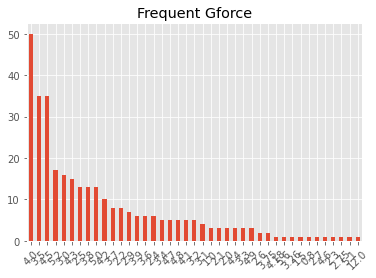

In [459]:
ax = df['Gforce_clean'].value_counts() \
.head(41) \
.plot(kind = 'bar', title= 'Frequent Gforce', rot = 45)

Awesome I broke down the DataFrame to where I got rid of all the duplicates in Coaster Name
Now I will do some univariariate analysis on Gforce because I want to pretend like I'm in Top gun.

Ouuu one rollercoaster has a Gforce of 12

Now I want to know the rollercoasters that have the highest amount of GForce

In [460]:
df[['Coaster_Name', 'Gforce_clean']]

,Coaster_Name,Gforce_clean
0,Switchback Railway,2.9
1,Flip Flap Railway,12.0
2,Switchback Railway (Euclid Beach Park),NaN
3,Loop the Loop (Coney Island),NaN
4,Loop the Loop (Young's Pier),NaN
...,...,...
985,Ice Breaker (roller coaster),NaN
986,Leviathan (Sea World),NaN
987,Pantheon (roller coaster),NaN
988,Tumbili,NaN


OK we see that flip flap railway is the roller coaster with 12 Gs, I wondered how it stacks up with other Roller Coasters

In [461]:
df=df.sort_values('Gforce_clean', ascending = False)

There are a lot of null values so I'll drop those to clean the data a bit more

In [462]:
df.dropna(subset=['Gforce_clean']).copy()

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Flash Pass Available,Gforce_clean,Fast Lane available,Theme
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,NaN,12.0,NaN,NaN
197,Moonsault Scramble,"1,509.2 ft (460.0 m)",55.9 mph (90.0 km/h),Fuji-Q Highland,Removed,"June 24, 1983",Steel – Shuttle,Meisho Amusement Machines,NaN,NaN,229.7 ft (70.0 m),NaN,6.5,NaN,NaN
151,Shock Wave (Six Flags Over Texas),"3,600 ft (1,100 m)",60 mph (97 km/h),Six Flags Over Texas,Operating,"April 22, 1978",Steel,Anton Schwarzkopf,42 in (107 cm),custom looping,116 ft (35 m),NaN,5.9,NaN,NaN
834,Ring Racer,"1,212 m (3,976 ft)",160.0 km/h (99.4 mph),Nürburgring,Closed,31 October 2013,Steel – Launched,S&S - Sansei Technologies,55 in (140 cm),High-Thrill coaster,37.5 m (123 ft),NaN,5.6,NaN,NaN
270,Olympia Looping,"4,101 ft (1,250 m)",52 mph (84 km/h),Oktoberfest,Operating,"September 17, 1989",Steel,BHS,130 cm (4 ft 3 in),NaN,110 ft (34 m),NaN,5.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,Desmo Race,"1,722.4 ft (525.0 m)",49.7 mph (80.0 km/h),Other,Operating,"July 25, 2019",Steel – Dueling – Racing,Maurer AG,NaN,Spike Dragster,72.2 ft (22.0 m),NaN,1.2,NaN,NaN
121,Alpen Blitz,"1,800 ft (550 m)",10 mph (16 km/h),Six Flags Great Adventure,Removed,1976,Steel,Anton Schwarzkopf,44 in (112 cm),Alpenblitz II,16 ft (4.9 m),NaN,1.0,NaN,NaN
433,Scooby's Ghoster Coaster,NaN,8 mph (13 km/h),Kings Island,Removed,"April 18, 1998",Steel – Suspended,Caripro,36 in (91 cm),Batflyer,35 ft (11 m),NaN,1.0,NaN,NaN
447,Canyon Blaster (Six Flags Magic Mountain),NaN,10 mph (16 km/h),Six Flags Magic Mountain,Operating,"May 30, 1999",Steel,E&F Miler Industries,33 in (84 cm),Family Coasters/16ft Oval w/helix on left,8 ft (2.4 m),NaN,1.0,NaN,NaN


Awesome now I want to find those new value in ascending order to plot and then I will find out what roller coasters I will ride in the future.

In [463]:
df.head()

,Coaster_Name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Flash Pass Available,Gforce_clean,Fast Lane available,Theme
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,NaN,12.0,NaN,NaN
197,Moonsault Scramble,"1,509.2 ft (460.0 m)",55.9 mph (90.0 km/h),Fuji-Q Highland,Removed,"June 24, 1983",Steel – Shuttle,Meisho Amusement Machines,NaN,NaN,229.7 ft (70.0 m),NaN,6.5,NaN,NaN
151,Shock Wave (Six Flags Over Texas),"3,600 ft (1,100 m)",60 mph (97 km/h),Six Flags Over Texas,Operating,"April 22, 1978",Steel,Anton Schwarzkopf,42 in (107 cm),custom looping,116 ft (35 m),NaN,5.9,NaN,NaN
834,Ring Racer,"1,212 m (3,976 ft)",160.0 km/h (99.4 mph),Nürburgring,Closed,31 October 2013,Steel – Launched,S&S - Sansei Technologies,55 in (140 cm),High-Thrill coaster,37.5 m (123 ft),NaN,5.6,NaN,NaN
270,Olympia Looping,"4,101 ft (1,250 m)",52 mph (84 km/h),Oktoberfest,Operating,"September 17, 1989",Steel,BHS,130 cm (4 ft 3 in),NaN,110 ft (34 m),NaN,5.2,NaN,NaN


In [464]:
df=df[['Coaster_Name', 'Gforce_clean']].head(10)

In [465]:
x = df['Gforce_clean']
y = df['Coaster_Name']

<BarContainer object of 10 artists>

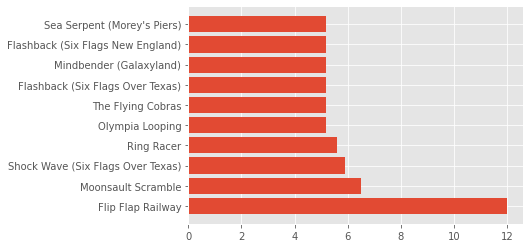

In [468]:
plt.barh(y,x)

Ok a lot more clearer, A time machine would be really nice to check out some of these rides. 

**After further research I discovered that the Flip Flap Railway was the first looping roller coaster but also was responsible for cracked ribs, nose bleeds and even death... Yea I personally will have to sit that one out.